# Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

Importing all the necessary packages/libraries.

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"
df = pd.read_csv(url)

Loading the file directly from the GitHub repository link using url

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In the above cell we can see the first 5 and last 5 rows of our dataset. We see that in our dataset there are a total of 7043 rows and 21 columns present. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model. Also the problem statement says that we are suppose to predict the customer churn so it makes this to be a Classification problem!

# EDA

In [4]:
df.drop("customerID", axis=1, inplace=True)

I am dropping the "customerID" column since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Using the `info` method we can see that there is 1 column with float data type, 2 columns with integer data type and 17 columns that have object data type. We will try to spearate these columns into numeric and object datatypes for easier analysis.

In [6]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


We have successfully bifurcated the object datatype column names and numeric data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process data only on numerical continous columns.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Using the `describe` method to check the numerical data details. There are only 3 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points showing no abnormality as such.

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I am using the `describe` method along with it's parameter `all` to include all the columns present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple data.

In [9]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The `isna` method along with the sum function gives us the details on the missing values.

<AxesSubplot:>

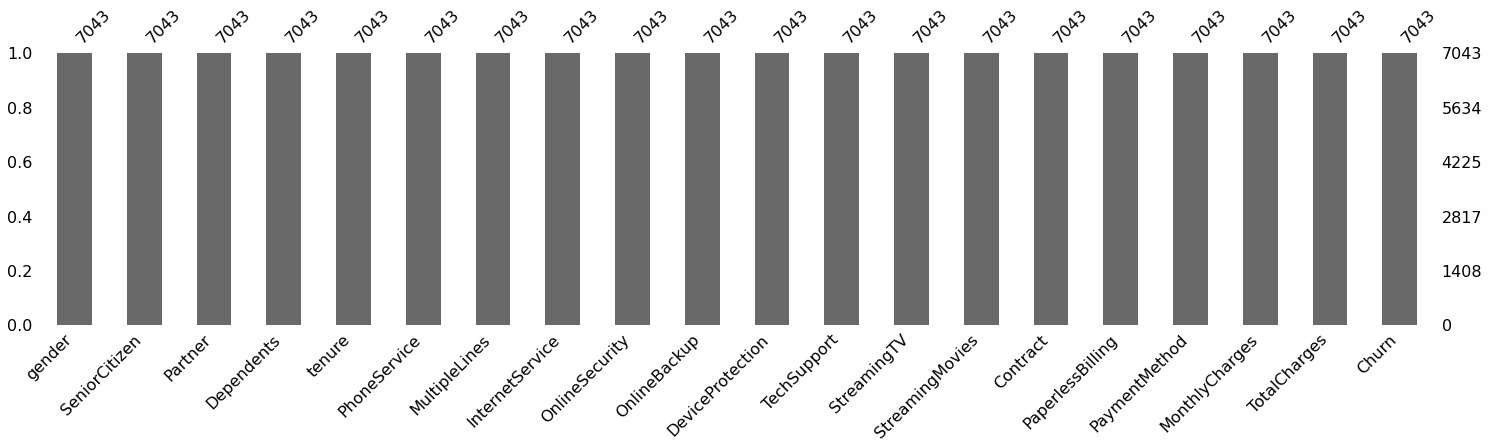

In [10]:
missingno.bar(df, figsize = (25,5))

The bar plot above gives us a visual on the lack of missing data in any of the columns ensuring that each and every row is filled with some or the other information.

In [11]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


With the `drop_duplicates` option I am getting rid of all the duplicate values present in our dataset.

In [12]:
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


With the usage of `nunique` method we can see the total number of unique values present in all the columns

In [13]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

Checking the number of rows covered by all the unique values present in our object data type columns. It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to fix this before we proceed with any further analysis.

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0        11
19.75       9
20.2        8
19.9        7
19.65       7
           ..
4613.95     1
4812.75     1
1170.5      1
2326.05     1
3377.8      1
Name: TotalCharges, Length: 6531, dtype: int64

Since we saw 11 rows with blank data present in the column "TotalCharges" we have replaced them with the value 0

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

Also column "TotalCharges" even though had all float numbers for some reason it showed as object data type and therefore we are converting it into the float data type now

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

Similarly I am converting the column "SeniorCitizen" from numeric data type to object datatype as it contains categorical information and it will be easier to process it like a category with the other. Having said that we will convert it back using encoding technique later on before we initiate our model building process

In [17]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


Now we have sucessfully made sure that object data type covers all the categorical column data while the numeric data type has the continous column information stored in it

# Visualization

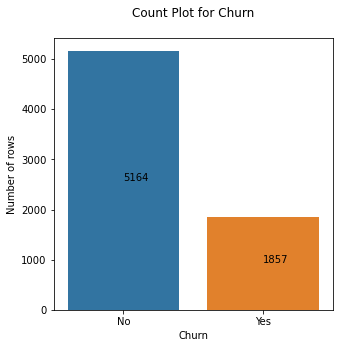

In [19]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Churn'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])        
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that "No Churn" values are way higher than "Yes Churn" data. Since this is our target label it indicates an imbalanced data which will need to be rectified later on.

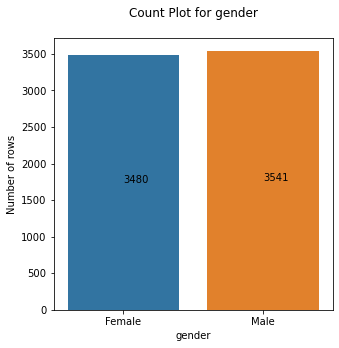

In [21]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'gender'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that the total number of male and female gender is almost same still males being at a higher end than female covering the data points in our gender column.

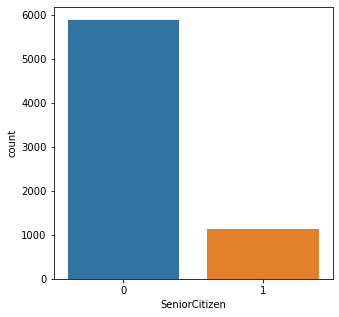

In [23]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'SeniorCitizen'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot we can see that the senior citizen value shows 0 to be not resent and 1 as being a senior citizen. So as we see less number of 1 present in our column it indicates that the number of non senior citizens is quite high than the senior citizens data.

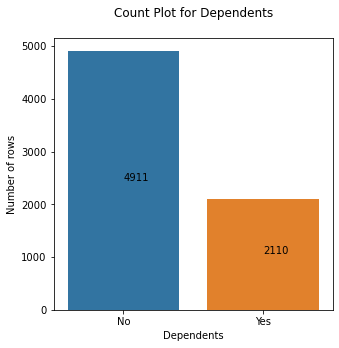

In [24]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Dependents'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people with dependents are way less that people who do not have anyone dependent on them.

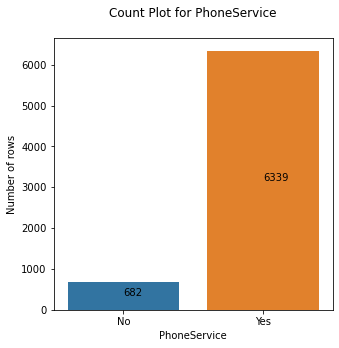

In [26]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PhoneService'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people with a phone service cover a large data chunk while there are only few people who do not own a phone service.

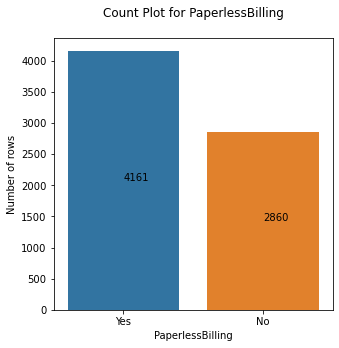

In [27]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaperlessBilling'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people who prefer paper less billing are high in number however we still have a huge number of people who prefer the traditional way of receiving a paper bill.

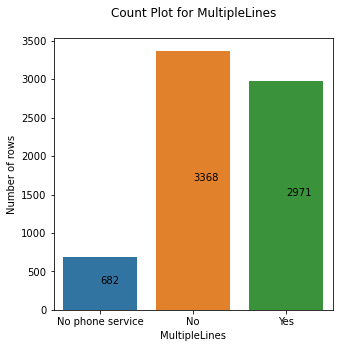

In [29]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'MultipleLines'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people with single line are higher in number than people who have multiple lines but we also see a minority of people who do not own a phone service yet.

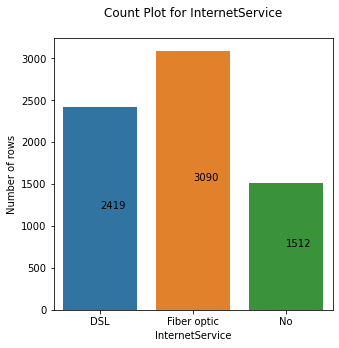

In [30]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'InternetService'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that majority of people have chosen to get a high speed fibre optic internet but there are many people who do not own an internet service at all

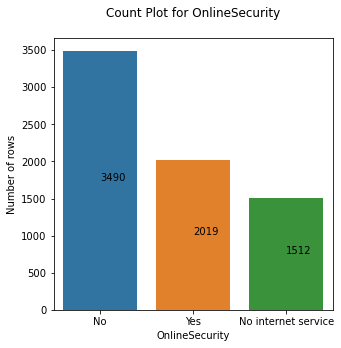

In [32]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineSecurity'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people who do not have any internet service obviously do not need any online security either but there is a huge number in people who own an internet service but do not use any online security yet.

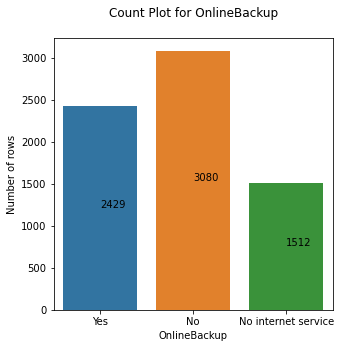

In [33]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineBackup'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that just like people with no internet service and online security the same chunk of folks have no online backup usage either. But the difference between people who use internet and do not have online backup vs people who use online back up is relatively lesser as compared to online security details.

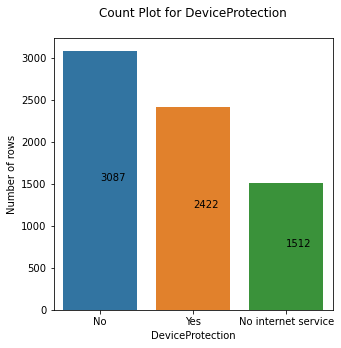

In [34]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'DeviceProtection'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people without any device protection is higher in number as compared to people who have some kind of device protection.

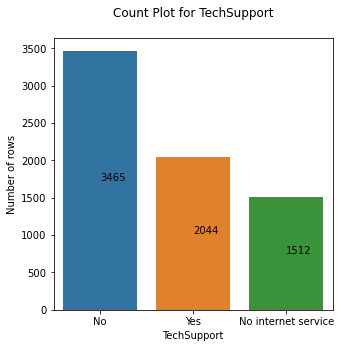

In [35]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'TechSupport'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people who do not need technical support is higher in number as compared to people who need technical assistance.

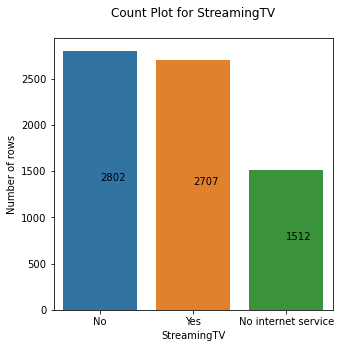

In [36]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingTV'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people who do not use streaming TV service is slightly higher than the people who do use streaming TV service.

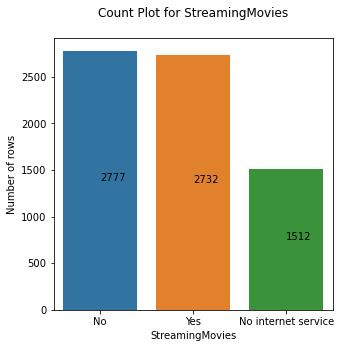

In [37]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingMovies'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that just like streaming TV service there are people who do not stream movies a slight higher than people who do enjoy streaming movies online.

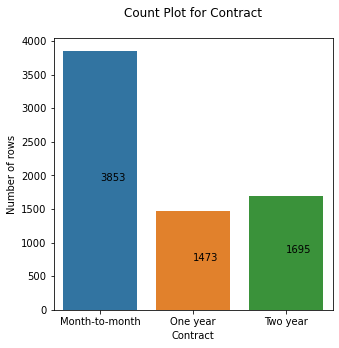

In [38]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Contract'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that there are a lot of people who prefer the month to month contract over the 1 year or 2 year contract term.

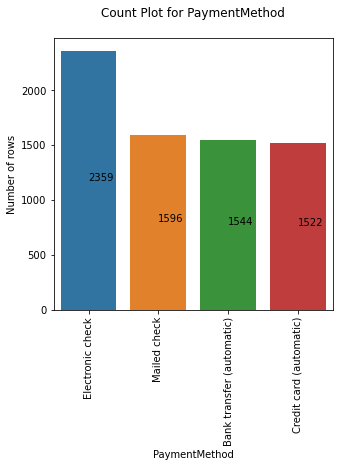

In [39]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaymentMethod'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()])
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xticks(rotation=90)
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that the preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option fall in a similar range of numbers

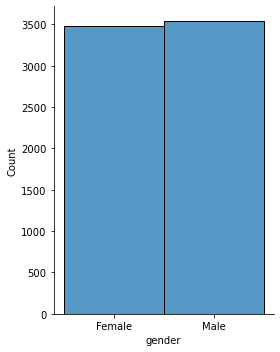

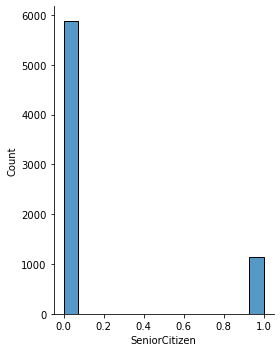

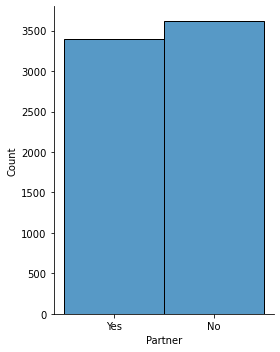

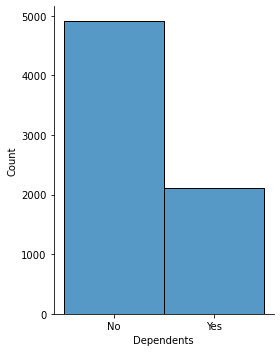

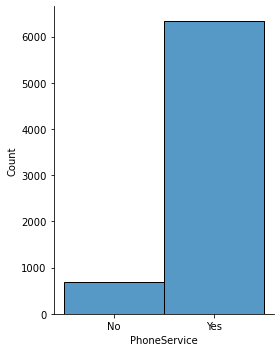

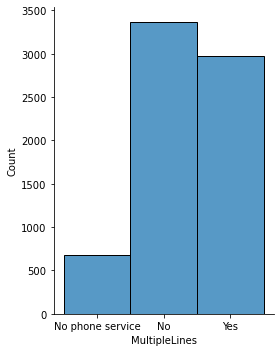

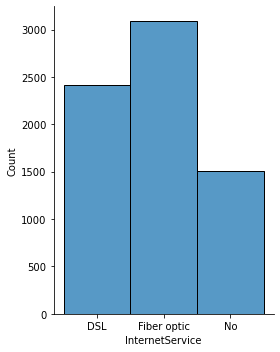

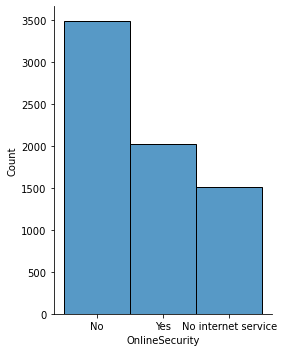

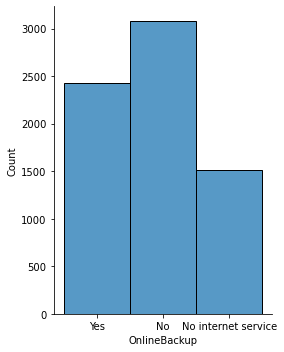

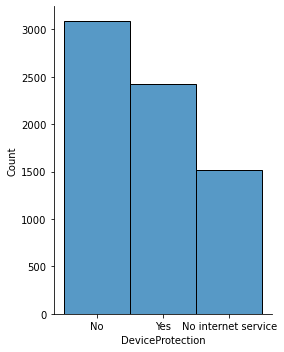

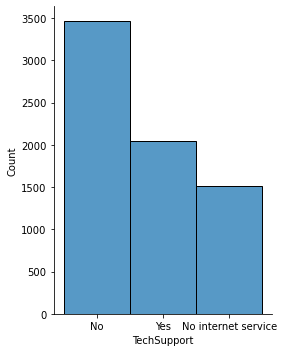

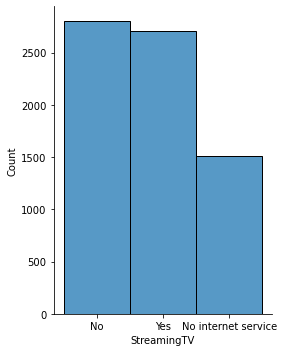

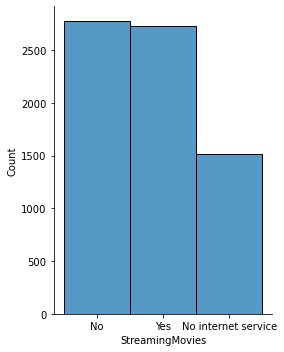

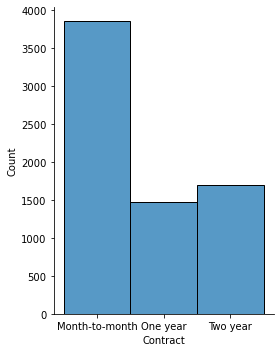

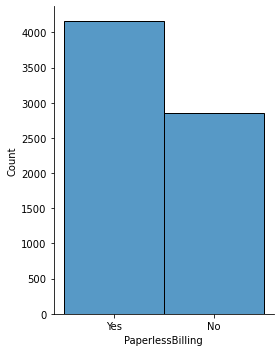

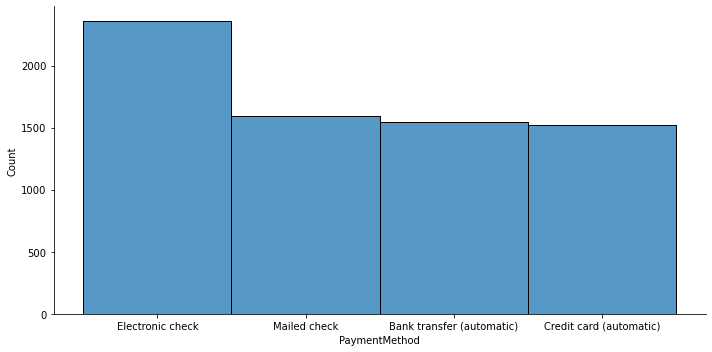

In [40]:
new_data=object_datatype
new_data.remove('Churn')
new_list=new_data
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, data=df, element="bars", aspect=aspect_ratio)

With the help of above bar plot we can identify the No churn and Yes churn data and understand that the "Yes Churn" option has been significantly lower than it counterpart. However area where it is higher are the pain points that will need to be resolved so that we can continue to retain our customer base.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

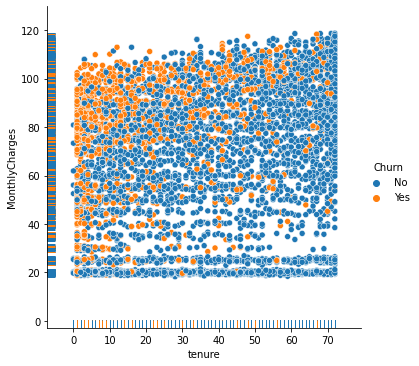

In [41]:
sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

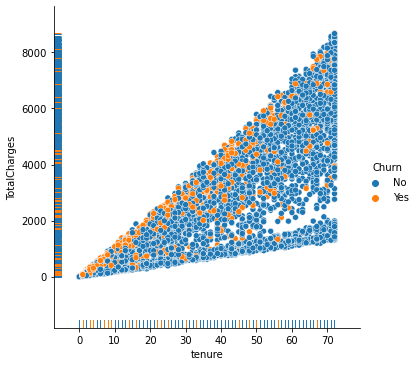

In [42]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

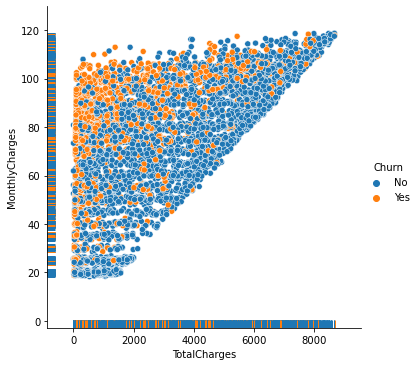

In [43]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

# Encoding the categorical object datatype columns

In [44]:
# Label Encoder

le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


I have used `LabelEncoder` to convert the object data type in our label column "Churn" into a numerical format.

In [45]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


I have used `OrdinalEncoder` inside a function to loop through all the categorical data columns and covert those feature values from object data type to numerical data type values.

In [46]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (7021, 20)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

With the help of `shape` and `isnull` method I am taking a look at our data frame values post applying the encoding technique on them.

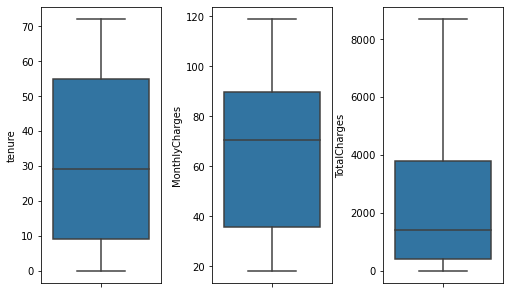

In [47]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the usage of box plot we tried to check for outliers in our continous data columns and we found no outliers in them. Since we do not have to worry about any outliers in categorical column we won't have to fix any outlier concerns in our dataset.

In [48]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959910
Churn               1.068139
dtype: float64

With the `skew` method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value. However most of those are categorical columns and we do not have to worry about outliers or skewness in catagorical data therefore we will ignore it. Having said that we will treat the skewness that is present in our continous data columns.

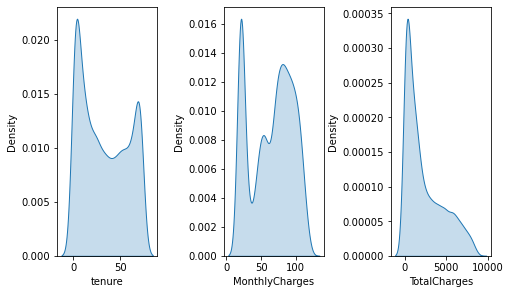

In [49]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above distribution plot we can see that our continous data columns have some skewness that will need to be treated and reduced to cover up an acceptable range in data values.

# Using Log Transform to fix skewness

In [50]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied `Log Transformation` on our numerical datatype columns to ensure that we do not have skewness in our dataset.

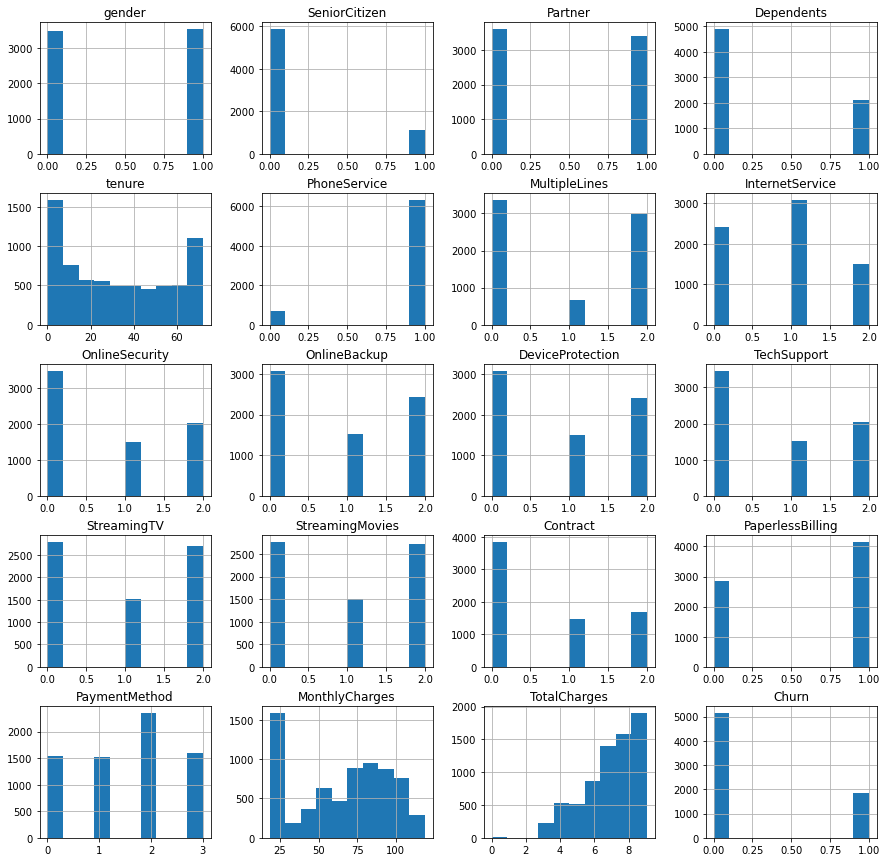

In [51]:
df.hist(figsize=(15,15))
plt.show()

I have generated a histogram for all our dataset columns after applying enconding technique and converting all object datatype columns to numeric datatype values.

# Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

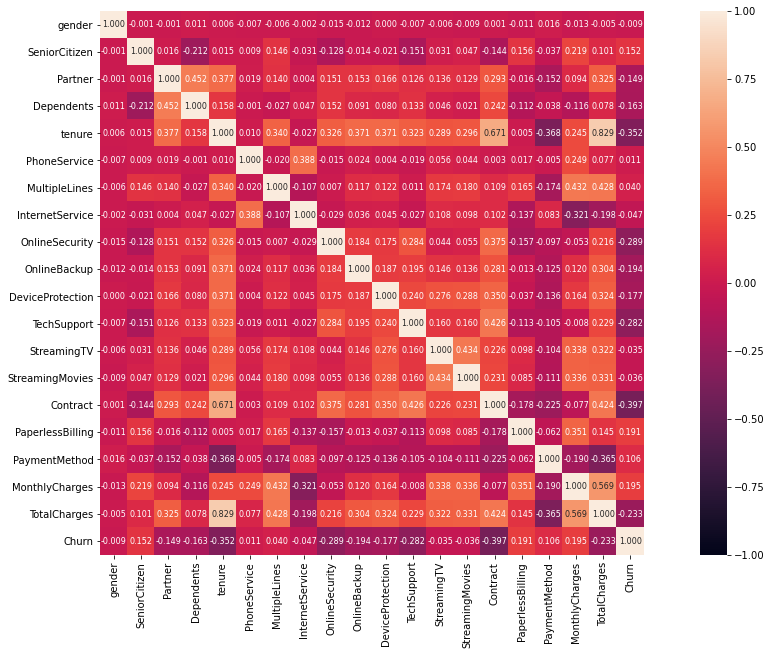

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size':8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.

# Correlation Bar Plot comparing features with our label

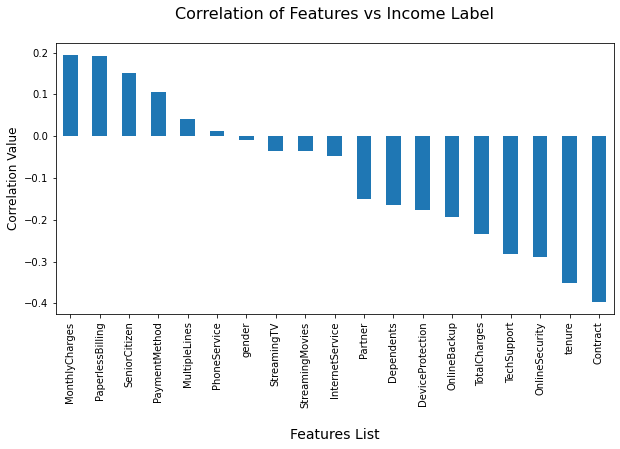

In [54]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that columns monthly charges, paperless billing, senior citizen, payment method, multiple lines and phone service are positively correlated with our target label churn while all the remaining features are negatively correlated with our label column.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [55]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Resolving the class imbalance issue in our label column

In [56]:
Y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates a huge class imbalance that we will have to fix by using the oversampling method.

In [57]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

`SMOTE` is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [58]:
Y.value_counts()

1    5164
0    5164
Name: Churn, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [59]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.052165,-0.514336,1.177248,-0.607377,-1.110088,-3.097034,0.023348,-1.263824,-0.784971,1.373740,-0.941257,-0.791571,-1.072782,-1.082243,-0.667307,0.763521,0.356081,-1.317153,-2.052385
1,1.040977,-0.514336,-0.917722,-0.607377,0.266121,0.328143,-1.046176,-1.263824,1.640150,-0.922581,1.341364,-0.791571,-1.072782,-1.082243,0.639871,-1.396034,1.373601,-0.377577,0.499939
2,1.040977,-0.514336,-0.917722,-0.607377,-1.068385,0.328143,-1.046176,-1.263824,1.640150,1.373740,-0.941257,-0.791571,-1.072782,-1.082243,-0.667307,0.763521,1.373601,-0.485056,-1.268735
3,1.040977,-0.514336,-0.917722,-0.607377,0.724857,-3.097034,0.023348,-1.263824,1.640150,-0.922581,1.341364,1.631320,-1.072782,-1.082243,0.639871,-1.396034,-1.678957,-0.885503,0.483737
4,-1.052165,-0.514336,-0.917722,-0.607377,-1.068385,0.328143,-1.046176,0.218317,-0.784971,-0.922581,-0.941257,-0.791571,-1.072782,-1.082243,-0.667307,0.763521,0.356081,0.099146,-1.060711


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building our Classification Models

In [60]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.82184353214562 on Random State 692


Great so with the help of random state selection process we have found our lucky number to be 692 amongst 1-1000 range.

# Feature importance bar graph

,Importance
Features,
Contract,0.147
TotalCharges,0.126
MonthlyCharges,0.122
tenure,0.115
TechSupport,0.065
OnlineSecurity,0.061
PaymentMethod,0.058
PaperlessBilling,0.056
Partner,0.035


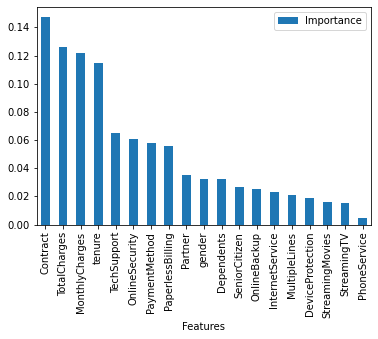

In [61]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar()
importances

Here with the help of `RandomForestClassifier` we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.

# Machine Learning Model for Classification with Evaluation Metrics

In [62]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=692)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a function that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [63]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1266
           1       0.79      0.82      0.80      1316

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

Accuracy Score: 79.82184353214562
Cross Validation Score: 77.60464009713357

Accuracy Score - Cross Validation Score is 2.2172034350120526


Created the Logistic Regression Model and checked for it's evaluation metrics.

In [64]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1266
           1       0.85      0.84      0.85      1316

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582

Accuracy Score: 84.54686289697909
Cross Validation Score: 82.26270600451446

Accuracy Score - Cross Validation Score is 2.2841568924646367


Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [65]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1266
           1       0.81      0.82      0.82      1316

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582

Accuracy Score: 81.17738187451587
Cross Validation Score: 80.82039430043434

Accuracy Score - Cross Validation Score is 0.35698757408152915


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [66]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1266
           1       0.90      0.86      0.88      1316

    accuracy                           0.88      2582
   macro avg       0.88      0.88      0.88      2582
weighted avg       0.88      0.88      0.88      2582

Accuracy Score: 87.8001549186677
Cross Validation Score: 84.99362209320041

Accuracy Score - Cross Validation Score is 2.8065328254672863


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [67]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76      1266
           1       0.75      0.89      0.81      1316

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582

Accuracy Score: 79.20216886134779
Cross Validation Score: 77.15935391171251

Accuracy Score - Cross Validation Score is 2.0428149496352717


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [68]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1266
           1       0.89      0.86      0.88      1316

    accuracy                           0.88      2582
   macro avg       0.88      0.88      0.88      2582
weighted avg       0.88      0.88      0.88      2582

Accuracy Score: 87.60650658404337
Cross Validation Score: 86.01018214889284

Accuracy Score - Cross Validation Score is 1.5963244351505352


Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

In [69]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1266
           1       0.90      0.85      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 87.29666924864446
Cross Validation Score: 83.89007310801657

Accuracy Score - Cross Validation Score is 3.4065961406278973


Created the XGB Classifier Model and checked for it's evaluation metrics.

In [70]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1266
           1       0.90      0.83      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 86.98683191324554
Cross Validation Score: 84.50009727421248

Accuracy Score - Cross Validation Score is 2.4867346390330596


Created the LGBM Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best Classification ML Model

In [71]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [10, 42, 692],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

After comparing all the classification models I have selected Extra Trees Classifier as my best model considering the accuracy score (being high) with the cross validation score against it and have listed down the chosen parameters above.

In [72]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [73]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 42, 692]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [74]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 42}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [75]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=200, n_jobs=-2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 87.10302091402014


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

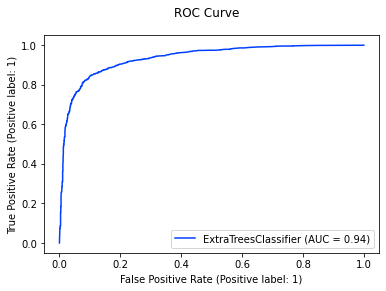

In [76]:
plt.style.use('seaborn-bright')

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 94%

# Confusion Matrix

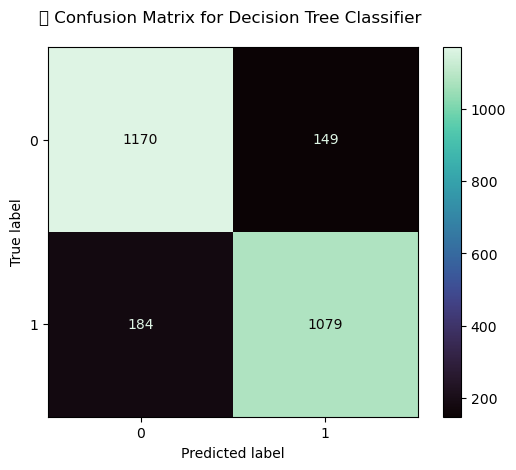

In [77]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

# Saving the model

In [78]:
filename = "FinalModel_E09.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E09.pkl']

Finally I am saving my best classification model using the joblib library.